# AUDI Used Car EDA

**Author: <a target="_blank" style="text-decoration: none;" href="https://tonmoy-talukder.netlify.app/">Tonmoy Talukder</a>**
<br>CS Udergrad, AUST, Dhaka, Bangladesh


## Dataset Referance: 
https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Importing libraries and packages

In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

### Read the csv file of the Dataset of Audi cars as pandas DataFrame

In [43]:
df = pd.read_csv("audi.csv")

#Display the Data Set

display(df)

print("The first five rows of the data frame is:")
display(df.head(5))

print("The last five rows of the data frame is:")
display(df.tail(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4


The first five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


The last five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


### Data Set Info

In [44]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

#### Unique Value Observations Function

Function to find the number of observations for unique value in a column of the Data Set

In [45]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

Getting number of observation for unique value in a column of Dataframe

In [46]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

## Data Set Observation using different plots

### Barplot

Function to show the number of observations for each unique value in a column using a barplot

In [47]:
def barplot(data, column_x, color, rotation, yticks):
    
    # barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # title for the plot
    plt.title("Number of cars present for each " + column_x)
    
    # lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

Creating subplots

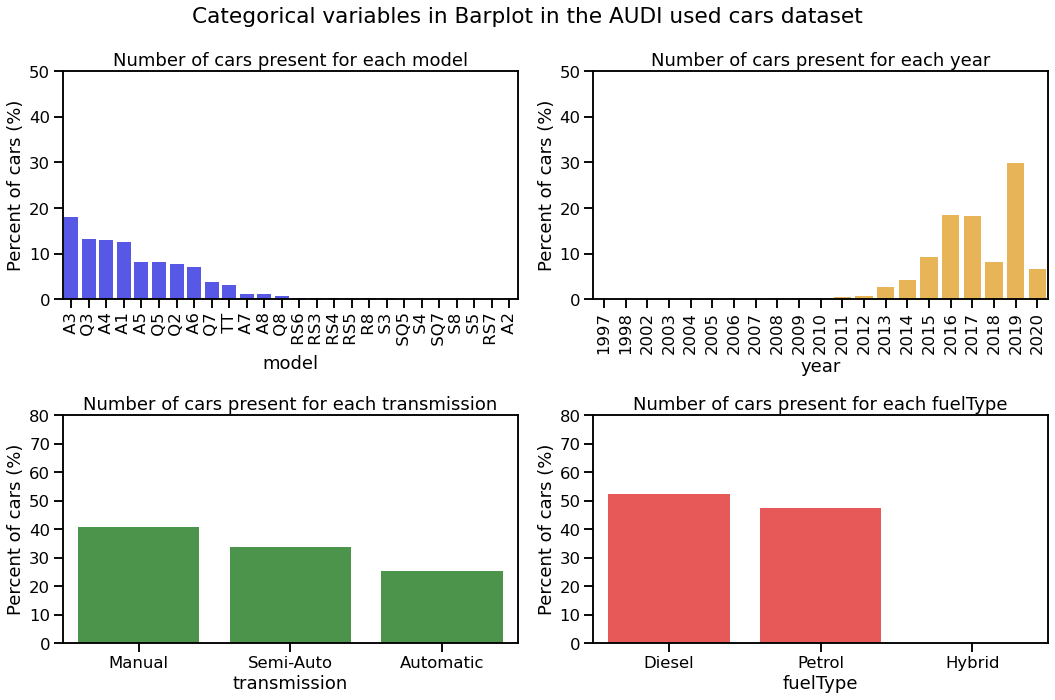

In [48]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,90,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,90,10))

# title for all the plots
plt.suptitle("Categorical variables in Barplot in the AUDI used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

These bar plot is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Model Subplot: This plot is showing us A3 model cars have the most in number but more than 20% of total. 

    2. Year Subpolt: Year subplot is saying most of the cars have built in 2019 year. COVID-19 may cause of the large number of production decression of the year 2020.

    3. Transmission Subplot: This subplot is indicating more than 40% cars' transmission are manual.

    4. Fuel Type Subplot: This subplot is informing generally people use Diesel or Petrol as their car's fuel.

### Scatter Plot

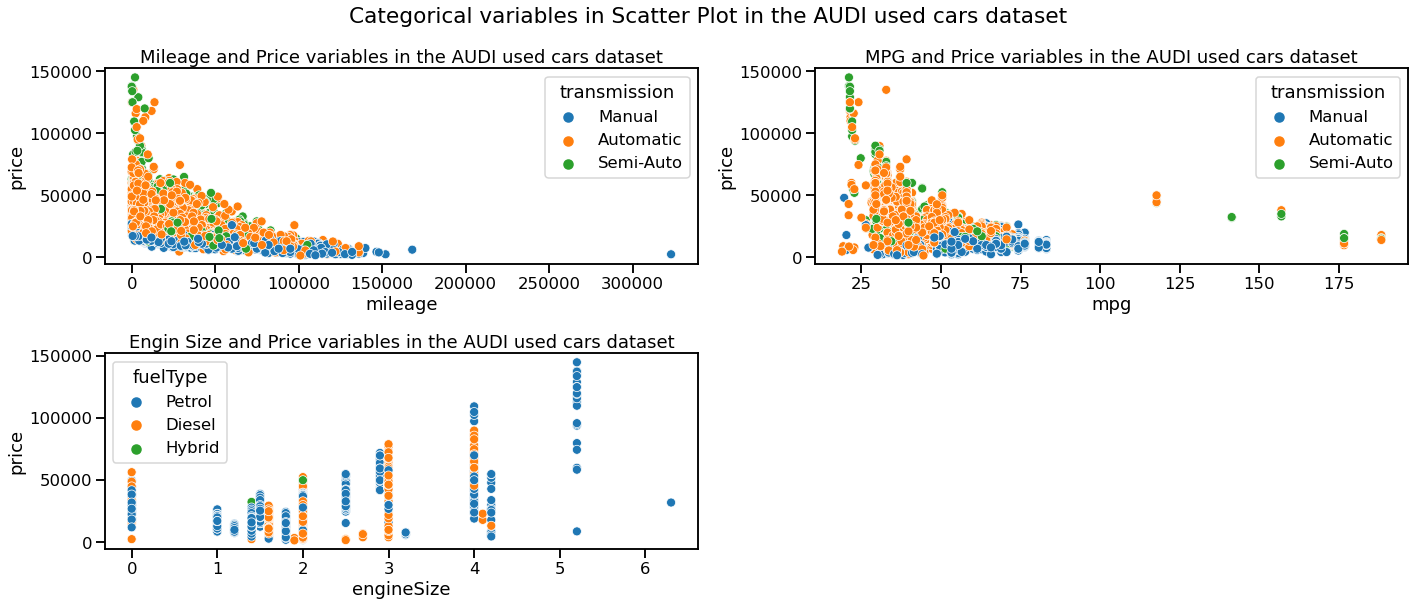

In [49]:
plt.figure(figsize=(20,12))

# mileage vs price
plt.subplot(3,2,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("Mileage and Price variables in the AUDI used cars dataset")

# mpg vs price
plt.subplot(3,2,2)
sns.scatterplot(x='mpg', y='price', data=df, hue='transmission')
plt.title("MPG and Price variables in the AUDI used cars dataset")

# engineSize vs price
plt.subplot(3,2,3)
sns.scatterplot(x='engineSize', y='price', data=df, hue='fuelType')
plt.title("Engin Size and Price variables in the AUDI used cars dataset")

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

# rotate the xticks 
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These scatter plot is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Mileage vs Price Subplot: This plot is showing us Semi-Auto cars are most expensive in the most cases with Automatic cars also sometimes. Where Manual cars are not so costly. And also Prices are decreasing gradualy when Mileages are increasing.

    2. MPG vs Price Subpolt: This plot is also informing us Prices are decreasing gradualy when MPGs are increasing. And transmission result is also showing same as like as Mileage vs Price subplot.

    3. Engin Size Subplot: This subplot is not providing any clear concept. So this is an example of bad data visualization.

### Histogram

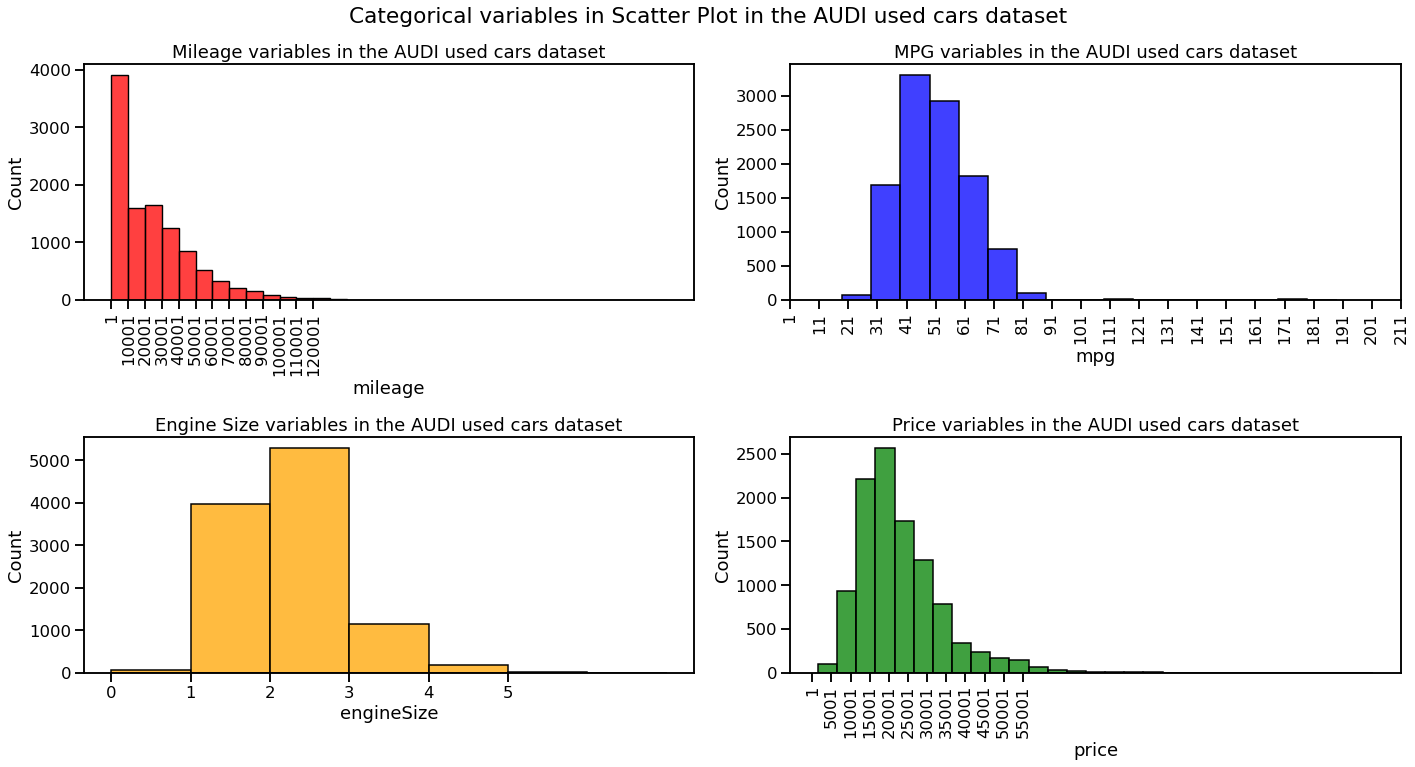

In [50]:
plt.figure(figsize=(20,15))

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

#subplot row1 column1 milage 
plt.subplot(3,2,1)
sns.histplot(data=df, x='mileage' , binwidth=10000 , color= "r" )
plt.xticks(np.arange(1,127801,10000), rotation=90)
plt.title("Mileage variables in the AUDI used cars dataset")

#subplot row1 column2 miles per gallon 
plt.subplot(3,2,2)
sns.histplot(data=df, x='mpg' , binwidth=10 , color= "blue")
plt.xticks(np.arange(1,212,10), rotation=90)
plt.title("MPG variables in the AUDI used cars dataset")

#subplot row2 column1 engine size
plt.subplot(3,2,3)
sns.histplot(data=df, x='engineSize', binwidth=1 , color= "orange")
plt.xticks(np.arange(0,6,1), rotation=0)
plt.title("Engine Size variables in the AUDI used cars dataset")

#subplot row2 column2 price
plt.subplot(3,2,4)
sns.histplot(data=df, x='price', binwidth=5000 , color= "green")
plt.xticks(np.arange(1,56001,5000), rotation=90)
plt.title("Price variables in the AUDI used cars dataset")

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These histogram is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Mileage Subplot: This plot is showing us cars' number is gradually decreasing when mileage is increasing.

    2. MPG Subpolt: This plot is informing most of the MPG counts are between 41 to 60 unit.

    3. Engine Size Subplot: This plot is showing most of the cars' engine size is 2.

    4. Price Subplot: This plot is showing most of cars' price range 14501 to 23001.

### Distribution Plot

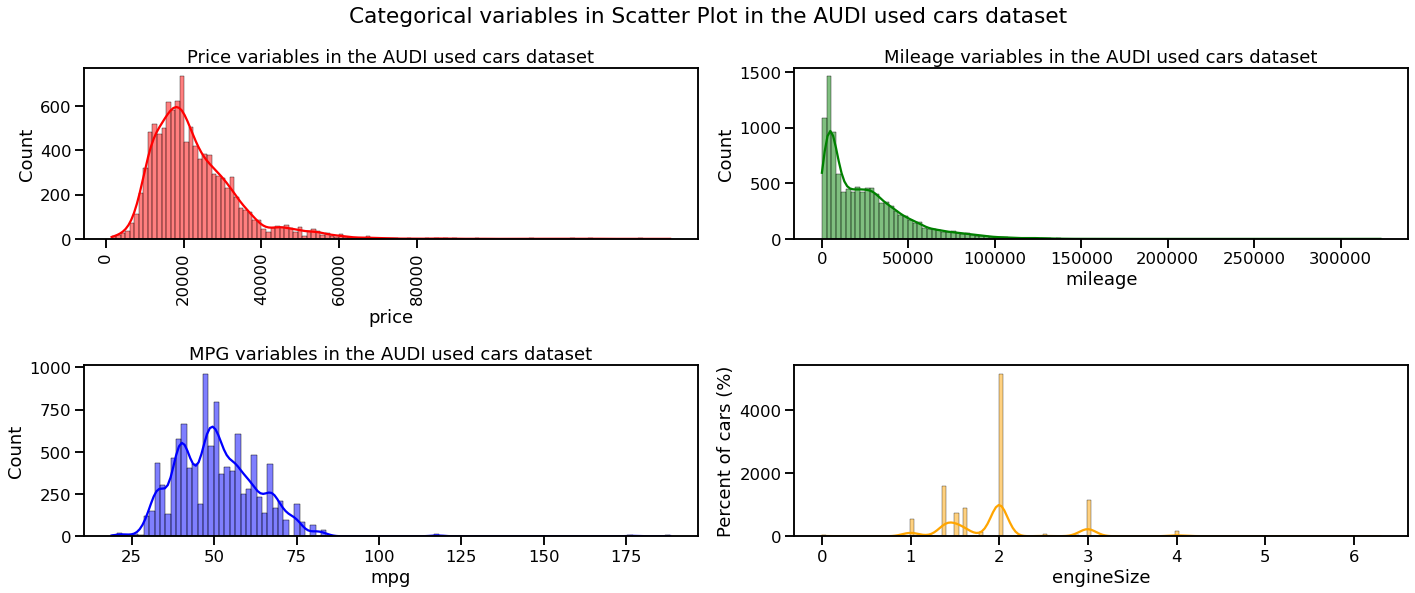

In [51]:
plt.figure(figsize=(20,12))

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', kde=True, color= "r")
plt.xticks(np.arange(0,80800,20000), rotation=90)
plt.title("Price variables in the AUDI used cars dataset")

#subplot row1 column2 milage 
plt.subplot(3,2,2)
sns.histplot(data=df, x='mileage' , kde=True , color= "green" )
plt.title("Mileage variables in the AUDI used cars dataset")

#subplot row2 column1 miles per gallon 
plt.subplot(3,2,3)
sns.histplot(data=df, x='mpg' , kde=True , color= "blue")
plt.title("MPG variables in the AUDI used cars dataset")

#subplot row2 column2 engine size
plt.subplot(3,2,4)
sns.histplot(data=df, x='engineSize', kde=True , color= "orange")
plt.ylabel("Percent of cars (%)")

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These histogram is showing us clear idea to make a comparison of the cars with different different categories. 

    
    1. Price Subplot: This plot is showing highest price of the cars is 20000.

    2. Mileage Subplot: This plot is showing us cars' number is gradually decreasing when mileage is increasing.

    3. MPG Subpolt: This plot is informing most of the MPG counts are 50 unit.

    4. Engine Size Subplot: This plot is showing most of the cars' engine size is 2.

### ECDF Plot

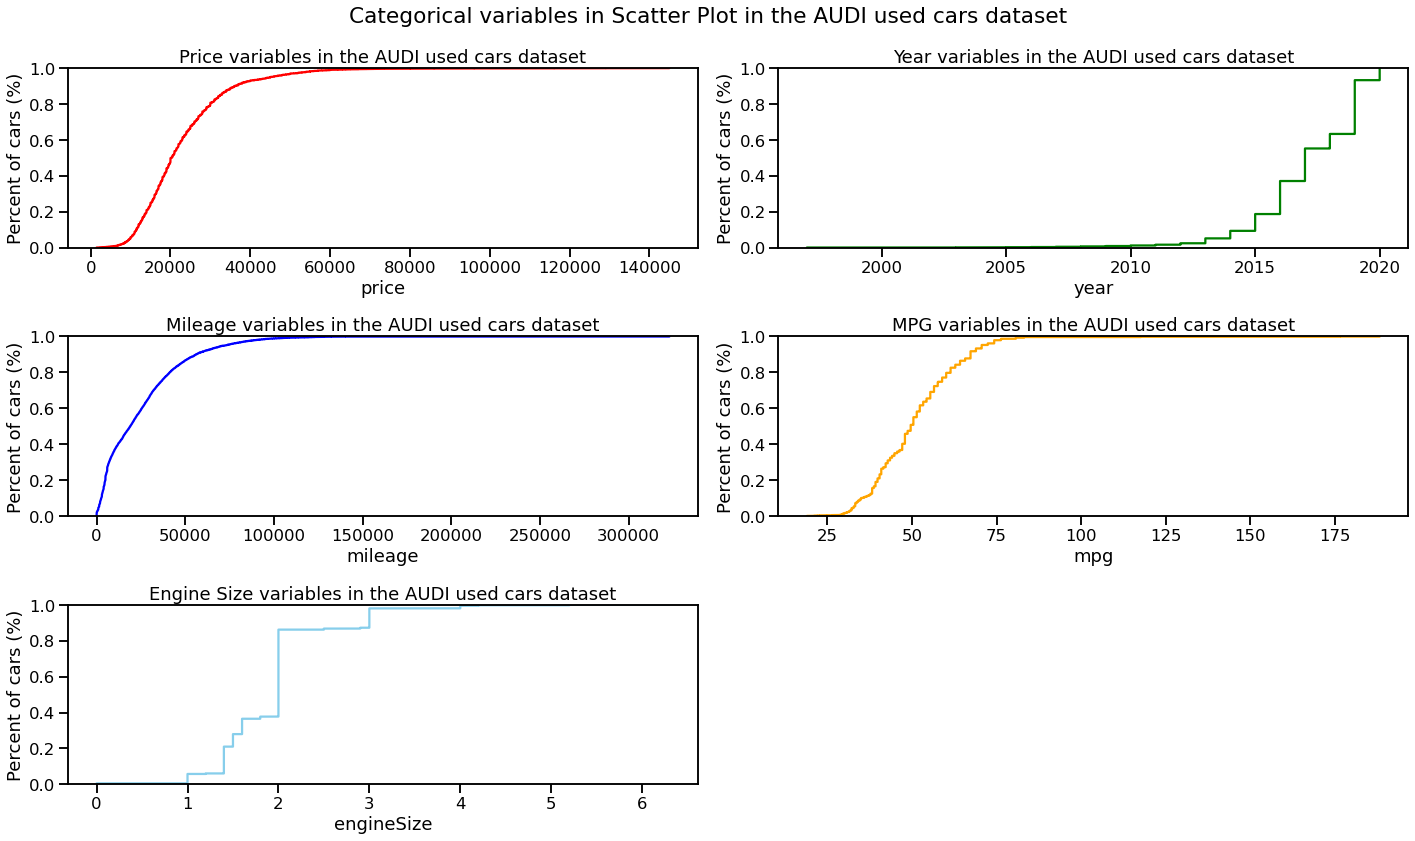

In [52]:
plt.figure(figsize=(20,12))

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.ecdfplot(data=df, x='price', color= "red")
plt.ylabel("Percent of cars (%)")
plt.title("Price variables in the AUDI used cars dataset")

#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.ecdfplot(data=df, x='year' , color= "green")
plt.ylabel("Percent of cars (%)")
plt.title("Year variables in the AUDI used cars dataset")

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.ecdfplot(data=df, x='mileage', color= "blue")
plt.ylabel("Percent of cars (%)")
plt.title("Mileage variables in the AUDI used cars dataset")

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.ecdfplot(data=df, x='mpg' , color= "orange")
plt.ylabel("Percent of cars (%)")
plt.title("MPG variables in the AUDI used cars dataset")

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.ecdfplot(data=df, x='engineSize', color= "skyblue")
plt.ylabel("Percent of cars (%)")
plt.title("Engine Size variables in the AUDI used cars dataset")

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These histogram is showing us clear idea to make a comparison of the cars with different different categories. 

    
    1. Price Subplot: 

    2. Year Subplot:

    3. Mileage Subplot: 

    4. MPG Subpolt: 

    5. Engine Size Subplot: 

### Violin Plot

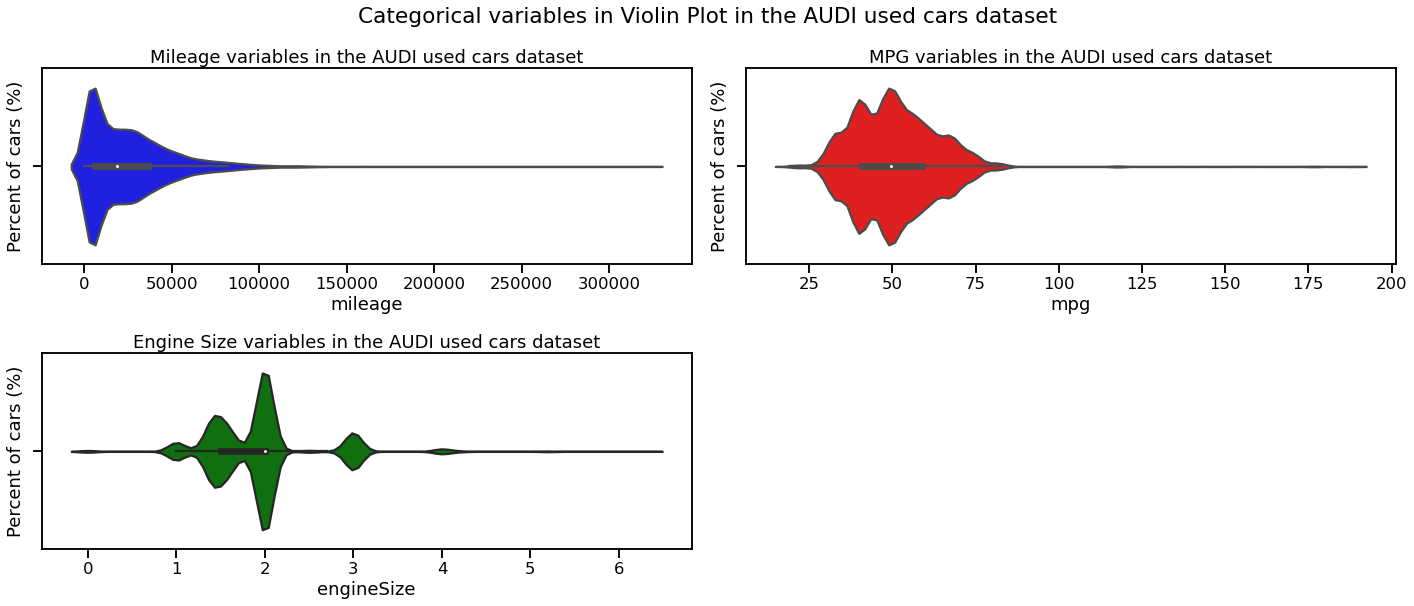

In [53]:
#Define Figure Size
plt.figure(figsize=(20,12))

# Title
plt.suptitle("Categorical variables in Violin Plot in the AUDI used cars dataset")

#subplot row1 column1 Mileage
plt.subplot(3,2,1)
sns.violinplot(x='mileage', data = df, color="blue")
plt.ylabel("Percent of cars (%)") # Labeling Y Axis
plt.title("Mileage variables in the AUDI used cars dataset") #Title of this Subplot

#subplot row1 column2 MPG
plt.subplot(3,2,2)
sns.violinplot(x='mpg', data = df, color="red")
plt.ylabel("Percent of cars (%)") # Labeling Y Axis
plt.title("MPG variables in the AUDI used cars dataset") #Title of this Subplot

#subplot row2 column1 Engine Size
plt.subplot(3,2,3)
sns.violinplot(x='engineSize', data = df, color="green")
plt.ylabel("Percent of cars (%)") # Labeling Y Axis
plt.title("Engine Size variables in the AUDI used cars dataset") #Title of this Subplot

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These violin plot is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Mileage Subplot: This plot is showing us when mileage is low, the number of cars are much. When the mileage is getting increase, so many cars may not be used or may be destroyed. 

    2. MPG Subpolt: MPG subplot is helping us to understand most of the cars' MPGs are between 45 to 60.

    3. Engine Size Subplot: This subplot is not providing any sequential data. Most of the cars' engine size is showing in position 2 unit.


## Data Aggregation

### EDA based on Model

In [54]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


#### Data preprocessing before visualization

In [55]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


#### Barplot: Percentage of cars, Average and Total selling price of cars by model

> Based on model, searching... :
- > Top 5 selling car models in the dataset.
- > The average selling price of the top 5 selling car models.
- > The total sale of the top 5 selling car models.

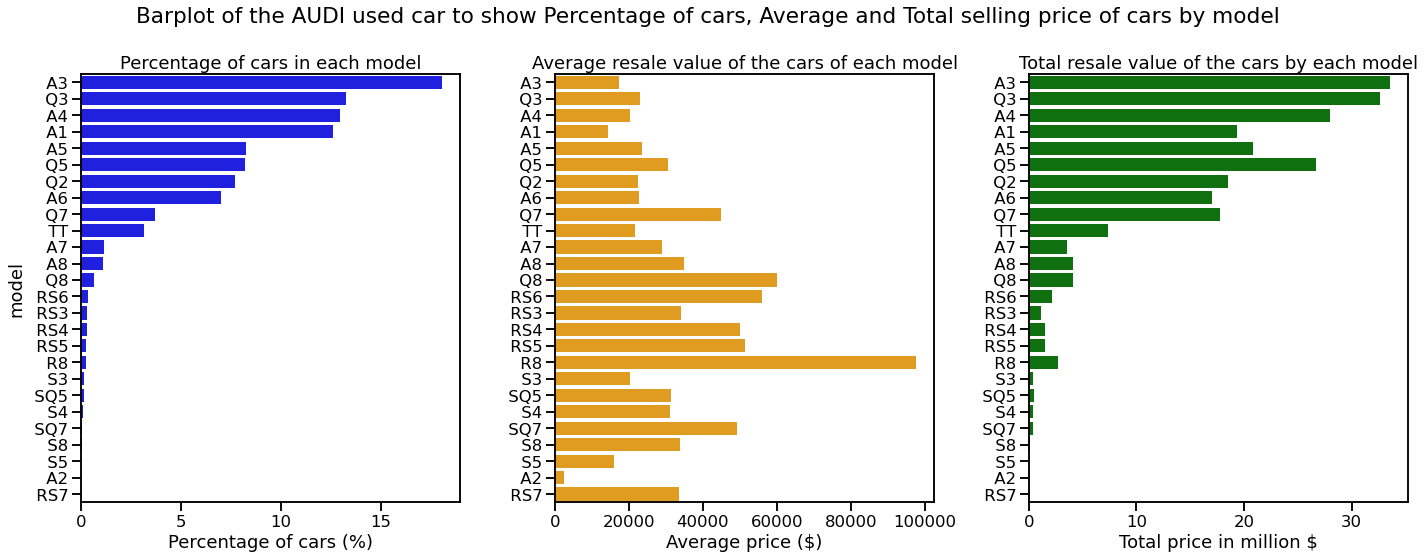

In [56]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car to show Percentage of cars, Average and Total selling price of cars by model")
plt.tight_layout()
plt.show()

### EDA based on Transmission

In [57]:
df_agg_transmission = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


#### Data preprocessing before visualization

In [58]:
# sort the dataframe based on the column 'count'
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


#### Barplot: Percentage of cars, Average and Total selling price of cars by transmission

> Based on transmission, searching... :
- > Top 5 selling car models in the dataset.
- > The average selling price of the top 5 selling car models.
- > The total sale of the top 5 selling car models.

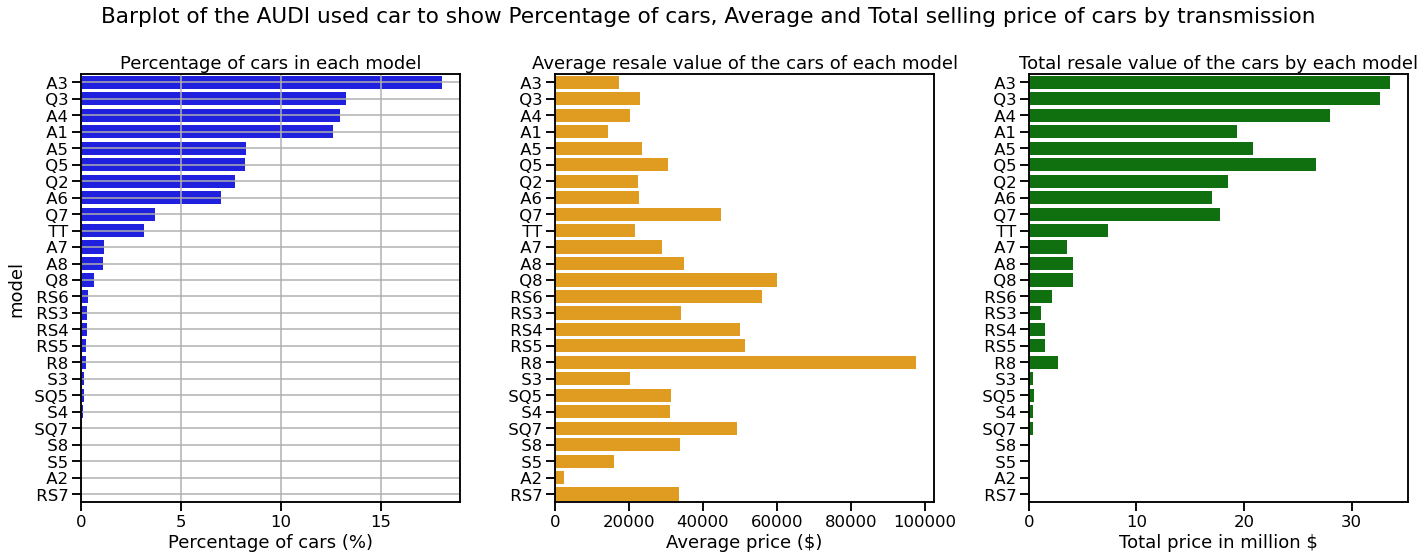

In [59]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car to show Percentage of cars, Average and Total selling price of cars by transmission")
plt.tight_layout()
plt.show()

### EDA based on Fuel Type

In [60]:
df_agg_fuelType = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


#### Data preprocessing before visualization

In [61]:
# sort the dataframe based on the column 'count'
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


#### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType

> Based on transmission, searching... :
- > Top 5 selling car models in the dataset.
- > The average selling price of the top 5 selling car models.
- > The total sale of the top 5 selling car models.

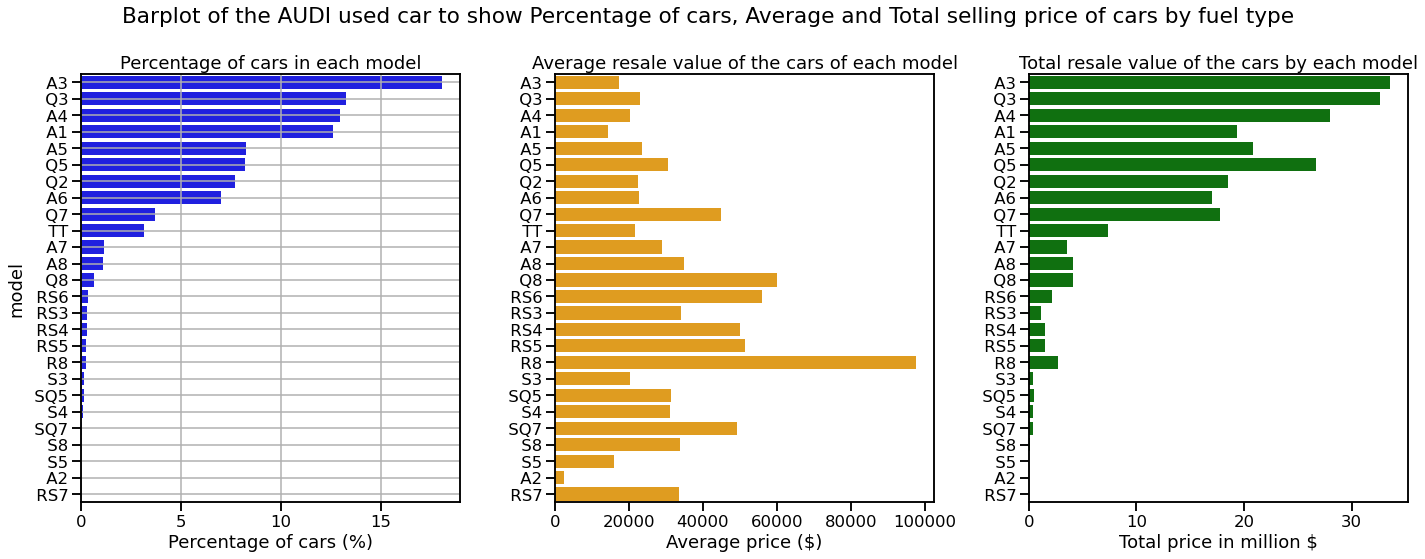

In [62]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car to show Percentage of cars, Average and Total selling price of cars by fuel type")
plt.tight_layout()
plt.show()

## Supervised Learning

> Objectives:
> - Linear Regression
> - Train data, test data
> - Understanding the equation of a straight line
> - Feature coefficient (slope, gradient, m)
> - Bias coeffcient (y-interccept, c)
> - Domain: x-axis, independent variable
> - Range: y-axis, dependent variable
> - Loss function, cost function, objective function, error function
> - Bias-variance tradeoff, overfitting, underfitting
> - Ordinary least square method
> - Gradient descent method
> - Residual, error, squared error, RMSE - Root Mean Squared Error

> Terminologies:
> - equation of a straight line: y=mx+c
> - Straight lines
> - feature coefficient (slope, gradient, m)
> - bias coeffcient (y-interccept, c)
> - domain: x-axis, independent variable
> - range: y-axis, dependent variable
> - loss function, cost function, objective function, error function
> - bias-variance tradeoff, overfitting, underfitting
> - ordinary least square method
> - gradient descent method
> - residual, error, squared error
> - train data, test data

### Linear Regression

#### Import required Libraries

In [63]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# import pandas as pd

#### Load Data 

In [64]:
display(df.head(10))
print("\nDataset shape is: ", df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4



Dataset shape is:  (10668, 8)


#### Separating the features and target variable

In [65]:
# Glance on the information of the dataset
df.info()

#Glance on the columns details
print("\nName of the columns: ",df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB

Name of the columns:  Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


>> *From the above information, there are 3 categorical columns. We will skip them for now.*

In [66]:
# Setting mileage, year, mpg, engineSize as features 
features = ['mileage', 'year', 'mpg', 'engineSize']
#Setting price as target
target = ['price']

X = df[features]
y = df[target]

print("Features Shape is: ", X.shape, "\nTarget shape is: ", y.shape)

Features Shape is:  (10668, 4) 
Target shape is:  (10668, 1)


#### Creating train and test set

In [67]:
# Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 4) (2134, 4) (8534, 1) (2134, 1)


#### Linear Regression

In [68]:
# Create a model for applying Linear Regression on the training set
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Prediction

In [69]:
# Prediction from the test set
y_pred = model.predict(X_test)

In [70]:
# Printing prediction
print(y_pred)

[[ 8404.61685932]
 [25242.08315391]
 [29769.42539605]
 ...
 [15223.19196191]
 [25409.82306727]
 [12240.88891797]]


In [71]:
# Overlook on the actual price value from the original dataset.
print(y_test)

       price
10442   9990
2907   22382
7388   28990
3016   30777
7890   14950
...      ...
8606   31450
8977   12900
3673   16750
1034   21996
6867    9547

[2134 rows x 1 columns]


>> *From the above information, we get as result...*
>> - The predicted price of the first car is about USD 8404.62 and actual price from the dataset is USD 9990.
>> - The predicted price value for the second car is about USD 25242.08 and the actual price is USD 22382.
>> - About USD 29769.43 and USD 28990 are the predicted and actual price value of the third car respectively.

>> *So, this is a huge difference between predicted and actual prices. Let's check the errors now to get a clear overview on the prediction.*

#### Prediction Error

In [72]:
# Finding Root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

5719.124258888146


>> ###### From the RMSE value, we can understand the prediction is showing about USD 5719.12 more either less price for every car of the dataset. It's a huge scaled error. So we have to update the model. 

#### One-hot encoding or Label encoding technique?

>> **We apply One-Hot Encoding when:**
>> - The categorical feature is not ordinal (like the countries above)
>> - The number of categorical features is less so one-hot encoding can be effectively applied

>> In this dataset, there are three categorical features are *NAN* columns. So, they are not ordinal and also in number there are less number of categorical variables. 

>> In addition, each label is assigned a unique integer based on alphabetical ordering in Label Encoding technique. And prediction performance is not also better than One-hot encoding for this data set.

> **That's I am choosing One-hot encoding**

### One-hot Encoding

In [73]:
#One-hot Encoding
df = pd.get_dummies(df, drop_first=True)

#### Separating the features and target variable

In [89]:
# Setting price as target
target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print("Features Shape is: ", X.shape, "\nTarget shape is: ", y.shape)

Features Shape is:  (10668, 33) 
Target shape is:  (10668, 1)


#### Creating train and test set

In [75]:
# Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


#### Training with Linear Regression

In [76]:
# Create a model for applying Linear Regression on the training set
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Linear Regression Coefficients and intercept

In [77]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
29,transmission_Manual,-1.205987e+03
32,fuelType_Petrol,-4.139250e+02
2,mpg,-1.692461e+02
1,mileage,-7.609565e-02
21,model_ RS7,-1.136868e-09
30,transmission_Semi-Auto,1.048772e+02
11,model_ Q2,7.336904e+02
5,model_ A3,1.289843e+03
24,model_ S5,1.295996e+03
6,model_ A4,1.594688e+03


In [78]:
# y_intercept
model.intercept_

array([-4060707.74307609])

#### Prediction

In [79]:
# Prediction from the test set
y_pred = model.predict(X_test)

In [90]:
# Printing prediction
print(y_pred)

[[ 6610.13223031]
 [24138.50809734]
 [29867.94104515]
 ...
 [16285.06313705]
 [24273.50178707]
 [10427.25104041]]


#### Prediction Error

In [84]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [85]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute percentage error: : lower is better
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE, "%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2720.087568599516
mean absolute percentage error =  13.502741779458328 %
mean squared error =  17229727.462187078
root mean squared error =  4150.870687239856
coefficient of determination =  0.8859936175487346


> - **Coefficient of determination value 0.886 is showing how much amazing this model**
> - **Absolute percentage error is about 13.50% only**

#### Comparing the actual and predicted target variable through visualization

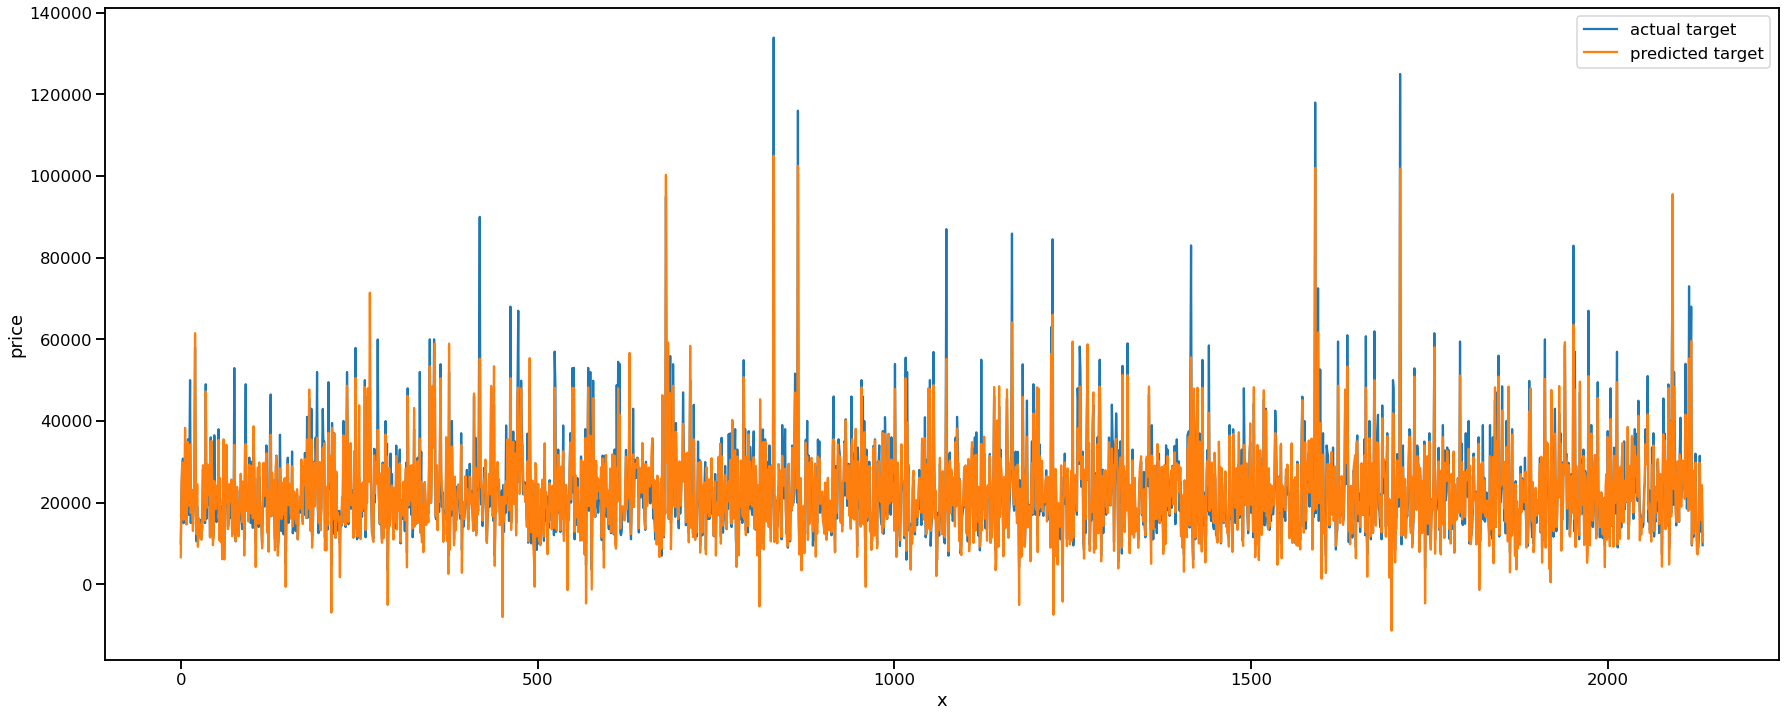

In [86]:
#Line Plot
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

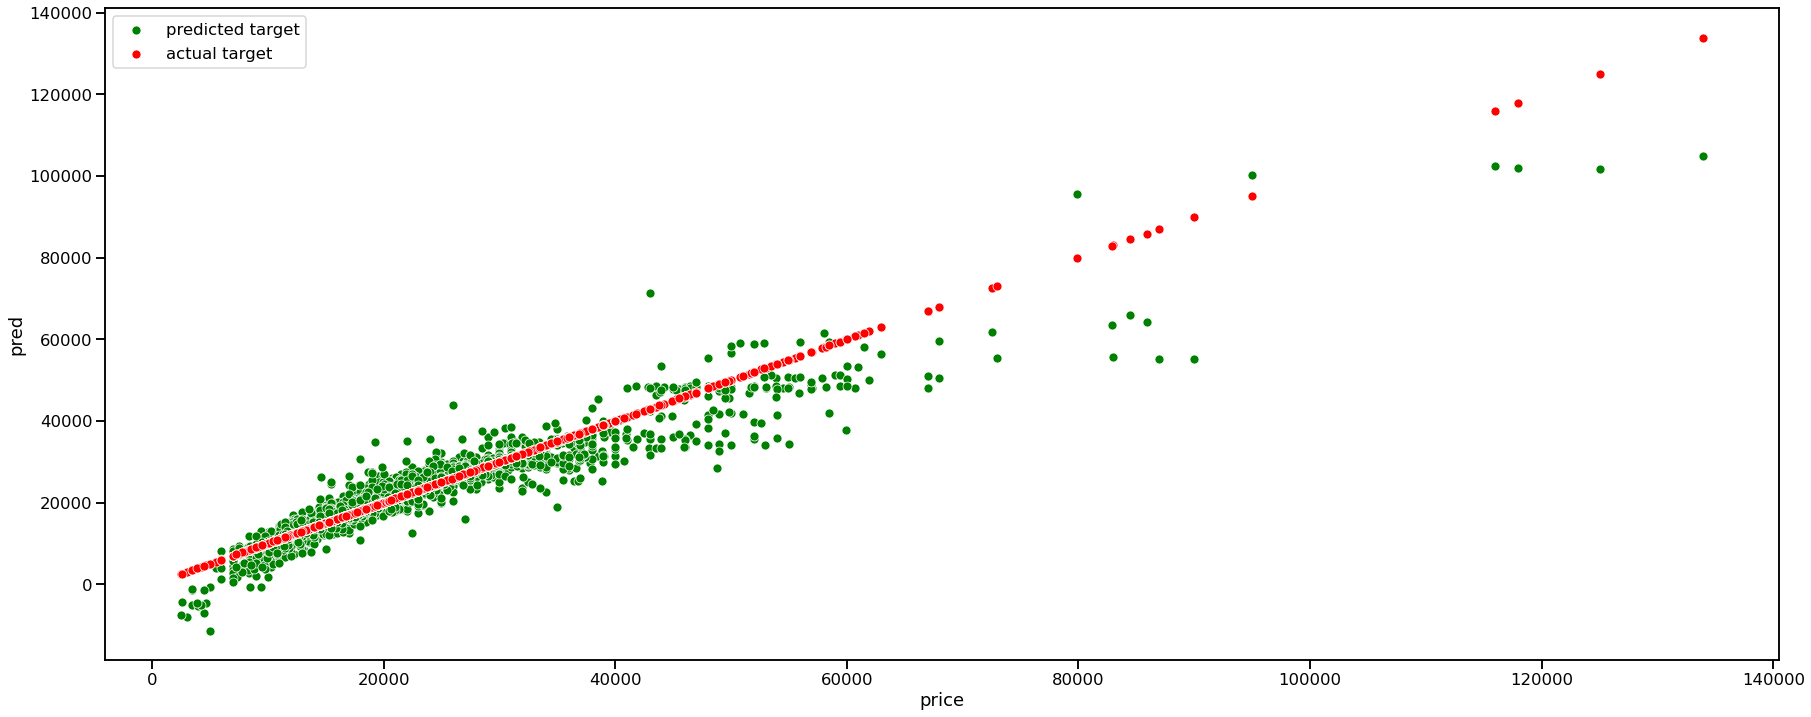

In [88]:
# Scatter Plot
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test, color='green', label='predicted target')

sns.scatterplot(x='price', y='price', data=y_test, color='red', label='actual target')
plt.show()


>> *From the above visualizations, we can measure that the predicted values are around to the actual values but not always. We should overlook on these points at the end:*
>> - When the prices are between 5000 USD to 40000 USD this model is showing nearly accurate. But out of this scale, the model is resulting so bad results
>> - Some values are less than zero
>> - Lots of fetures

> **So, this model is not good enough for this dataset to prediction almost accurately.**

>> We can develop this model to get more accurate data, we may use different algorithm either reduce features either increase features. So, let's moving to the next.